# 3. Managing Dataframes

In [1]:
import pandas as pd
import numpy as np

In [15]:
import datetime as dt

In [252]:
%matplotlib inline

In [4]:
df_wt = pd.read_csv("./data/watermarks.csv")
df_wt.shape

(244768, 13)

In [5]:
df_wt.head()

,Id,Url,CreationDate,Client_Type,ClientId,AgencyName,Detected_Info,Response,ResponseDate,Total_Occupancy,Image_Width,Image_Height,ExecutionDate
0,565765063,https://d.inmofactory.com/1/116961/19999138/28...,2020-03-12 08:23:15,Profesional,9202762595436,MONTALVO GRUPO INMOBILIARIO,[],"{""recognition"":{""@id"":""sdrn:adevinta:recogniti...",2020-03-12 08:30:25,0.00,1200.0,800.0,2020-03-12 07:30:02
1,565761791,https://d.fotocasa.es/anuncio/2020/03/12/15497...,2020-03-12 07:56:13,Profesional,9202753479605,"SERVIHABITAT SERVICIOS INMOBILIARIOS, S.L.",[],"{""recognition"":{""@id"":""sdrn:adevinta:recogniti...",2020-03-12 08:30:35,0.00,1920.0,1080.0,2020-03-12 07:30:02
2,565764726,https://d.inmofactory.com/1/116961/19972746/28...,2020-03-12 08:23:10,Profesional,9202762595436,MONTALVO GRUPO INMOBILIARIO,[],"{""recognition"":{""@id"":""sdrn:adevinta:recogniti...",2020-03-12 08:30:35,0.00,1200.0,800.0,2020-03-12 07:30:02
3,565765090,https://images.inmofactory.com/inmofactory/doc...,2020-03-12 08:23:16,Profesional,9202757128872,OCASION CASA,"[{""probability"": 4.130975526095426e-07, ""strin...","{""recognition"":{""@id"":""sdrn:adevinta:recogniti...",2020-03-12 08:30:36,0.02,1200.0,800.0,2020-03-12 07:30:02
4,565764729,https://d.inmofactory.com/1/116961/19972746/28...,2020-03-12 08:23:10,Profesional,9202762595436,MONTALVO GRUPO INMOBILIARIO,[],"{""recognition"":{""@id"":""sdrn:adevinta:recogniti...",2020-03-12 08:30:36,0.00,1200.0,800.0,2020-03-12 07:30:02


## 3.1. Indexing and Selecting Data

The axis labeling information in pandas objects serves many purposes:

- Identifies data (i.e. provides metadata) using known indicators, important for analysis, visualization, and interactive console display.

- Enables automatic and explicit data alignment.

- Allows intuitive getting and setting of subsets of the data set.

### 3.1.1. Different choices for indexing

Pandas now supports three types of multi-axis indexing.

- .loc is primarily label based, but may also be used with a boolean array. .loc will raise KeyError when the items are not found. Allowed inputs are:

- .iloc is primarily integer position based (from 0 to length-1 of the axis), but may also be used with a boolean array. .iloc will raise IndexError if a requested indexer is out-of-bounds, except slice indexers which allow out-of-bounds indexing. (this conforms with Python/NumPy slice semantics). Allowed inputs are:

.loc, .iloc, and also [] indexing can accept a callable as indexer. See more at Selection By Callable.

Getting values from an object with multi-axes selection uses the following notation (using .loc as an example, but the following applies to .iloc as well). Any of the axes accessors may be the null slice :. Axes left out of the specification are assumed to be :, e.g. p.loc['a'] is equivalent to p.loc['a', :, :].

In [55]:
df_wt.set_index('ExecutionDate',inplace=True)

In [56]:
df_wt.iloc[3:6]

,Url,CreationDate,Client_Type,ClientId,AgencyName,Detected_Info,Response,ResponseDate,Total_Occupancy,Image_Width,Image_Height
ExecutionDate,,,,,,,,,,,
2020-03-12 07:30:02,https://images.inmofactory.com/inmofactory/doc...,2020-03-12 08:23:16,Profesional,9202757128872,OCASION CASA,"[{""probability"": 4.130975526095426e-07, ""strin...","{""recognition"":{""@id"":""sdrn:adevinta:recogniti...",2020-03-12 08:30:36,0.02,1200.0,800.0
2020-03-12 07:30:02,https://d.inmofactory.com/1/116961/19972746/28...,2020-03-12 08:23:10,Profesional,9202762595436,MONTALVO GRUPO INMOBILIARIO,[],"{""recognition"":{""@id"":""sdrn:adevinta:recogniti...",2020-03-12 08:30:36,0.00,1200.0,800.0
2020-03-12 07:30:02,https://d.inmofactory.com/1/105392/20609898/29...,2020-03-12 08:25:41,Profesional,9202757236133,INMOBILIARIA NAVEROS,[],"{""recognition"":{""@id"":""sdrn:adevinta:recogniti...",2020-03-12 08:30:36,0.00,1200.0,800.0


In [57]:
df_wt.iloc[3,0]

'https://images.inmofactory.com/inmofactory/documents/1/105075/20644095/298900042.jpg'

In [58]:
df_wt.columns

Index(['Url', 'CreationDate', 'Client_Type', 'ClientId', 'AgencyName',
       'Detected_Info', 'Response', 'ResponseDate', 'Total_Occupancy',
       'Image_Width', 'Image_Height'],
      dtype='object')

In [59]:
df_wt.reset_index(inplace=True)

In [60]:
df_wt.loc[3:6]

,ExecutionDate,Url,CreationDate,Client_Type,ClientId,AgencyName,Detected_Info,Response,ResponseDate,Total_Occupancy,Image_Width,Image_Height
3,2020-03-12 07:30:02,https://images.inmofactory.com/inmofactory/doc...,2020-03-12 08:23:16,Profesional,9202757128872,OCASION CASA,"[{""probability"": 4.130975526095426e-07, ""strin...","{""recognition"":{""@id"":""sdrn:adevinta:recogniti...",2020-03-12 08:30:36,0.02,1200.0,800.0
4,2020-03-12 07:30:02,https://d.inmofactory.com/1/116961/19972746/28...,2020-03-12 08:23:10,Profesional,9202762595436,MONTALVO GRUPO INMOBILIARIO,[],"{""recognition"":{""@id"":""sdrn:adevinta:recogniti...",2020-03-12 08:30:36,0.00,1200.0,800.0
5,2020-03-12 07:30:02,https://d.inmofactory.com/1/105392/20609898/29...,2020-03-12 08:25:41,Profesional,9202757236133,INMOBILIARIA NAVEROS,[],"{""recognition"":{""@id"":""sdrn:adevinta:recogniti...",2020-03-12 08:30:36,0.00,1200.0,800.0
6,2020-03-12 07:30:02,https://d.inmofactory.com/1/117312/20392879/29...,2020-03-12 07:30:41,Profesional,9202762691449,INMONALON,[],"{""recognition"":{""@id"":""sdrn:adevinta:recogniti...",2020-03-12 08:30:37,0.00,1200.0,900.0


In [61]:
df_wt.columns

Index(['ExecutionDate', 'Url', 'CreationDate', 'Client_Type', 'ClientId',
       'AgencyName', 'Detected_Info', 'Response', 'ResponseDate',
       'Total_Occupancy', 'Image_Width', 'Image_Height'],
      dtype='object')

*Warning*

pandas aligns all AXES when setting Series and DataFrame from .loc, and .iloc.

This will not modify df because the column alignment is before value assignment.

In [65]:
df_wt.loc[:, ['ExecutionDate','Client_Type']]

,ExecutionDate,Client_Type
0,2020-03-12 07:30:02,Profesional
1,2020-03-12 07:30:02,Profesional
2,2020-03-12 07:30:02,Profesional
3,2020-03-12 07:30:02,Profesional
4,2020-03-12 07:30:02,Profesional
...,...,...
244763,2020-03-13 11:25:11,Profesional
244764,2020-03-13 11:33:22,Profesional
244765,2020-03-13 11:26:12,Profesional
244766,2020-03-13 11:30:21,Profesional


In [64]:
df_wt.loc[:, ['ExecutionDate','Client_Type']] = \
    df_wt[['ExecutionDate','Client_Type']]

### 3.1.2. Reindexing

*reindex()* is the fundamental data alignment method in pandas. It is used to implement nearly all other features relying on label-alignment functionality. To reindex means to conform the data to match a given set of labels along a particular axis. This accomplishes several things:

- Reorders the existing data to match a new set of labels

- Inserts missing value (NA) markers in label locations where no data for that label existed

- If specified, fill data for missing labels using logic (highly relevant to working with time series data)

In [492]:
s = pd.Series(np.arange(4), index=['a', 'a', 'b', 'c'])
s

a    0
a    1
b    2
c    3
dtype: int64

In [493]:
labels = ['c', 'd']

In [494]:
try:
    s.reindex(labels)
except:
    print("ValueError: cannot reindex from a duplicate axis")

ValueError: cannot reindex from a duplicate axis


In [500]:
s.reset_index()[0]

0    0
1    1
2    2
3    3
Name: 0, dtype: int64

In [495]:
s.loc[s.index.intersection(labels)].reindex(labels)

c    3.0
d    NaN
dtype: float64

### 3.1.3. Selecting data : slicing and subseting

**Slicing ranges**

The most robust and consistent way of slicing ranges along arbitrary axes is described in the Selection by Position section detailing the .iloc method. For now, we explain the semantics of slicing using the [] operator.

With Series, the syntax works exactly as with an ndarray, returning a slice of the values and the corresponding labels:

In [68]:
df_wt.loc[2:5, ['ExecutionDate','Total_Occupancy']]

,ExecutionDate,Total_Occupancy
2,2020-03-12 07:30:02,0.00
3,2020-03-12 07:30:02,0.02
4,2020-03-12 07:30:02,0.00
5,2020-03-12 07:30:02,0.00


In [71]:
df_wt_slice = df_wt[['ExecutionDate','Total_Occupancy']] \
    .set_index('ExecutionDate').head(10).copy()

df_wt_slice

,Total_Occupancy
ExecutionDate,
2020-03-12 07:30:02,0.00
2020-03-12 07:30:02,0.00
2020-03-12 07:30:02,0.00
2020-03-12 07:30:02,0.02
2020-03-12 07:30:02,0.00
2020-03-12 07:30:02,0.00
2020-03-12 07:30:02,0.00
2020-03-12 07:30:02,0.02
2020-03-12 07:30:02,0.00


In [72]:
df_wt_slice[:5] = 10.0
df_wt_slice

,Total_Occupancy
ExecutionDate,
2020-03-12 07:30:02,10.00
2020-03-12 07:30:02,10.00
2020-03-12 07:30:02,10.00
2020-03-12 07:30:02,10.00
2020-03-12 07:30:02,10.00
2020-03-12 07:30:02,0.00
2020-03-12 07:30:02,0.00
2020-03-12 07:30:02,0.02
2020-03-12 07:30:02,0.00


**Selection by label**

Warning: Whether a copy or a reference is returned for a setting operation, may depend on the context. This is sometimes called chained assignment and should be avoided. 

In [74]:
dfl = pd.DataFrame(np.random.randn(5, 4),
    columns=list('ABCD'),
    index=pd.date_range('20130101', periods=5))
dfl

In [77]:
try:
    dfl.loc[2:3]
except TypeError:
    print("TypeError: cannot do slice indexing on <class 'pandas.core.indexes.datetimes.DatetimeIndex'> with these indexers [2] of <class 'int'>")

TypeError: cannot do slice indexing on <class 'pandas.core.indexes.datetimes.DatetimeIndex'> with these indexers [2] of <class 'int'>


In [75]:
dfl.loc['20130102':'20130104']

,A,B,C,D
2013-01-02,0.466160,-2.132536,-0.843975,1.172475
2013-01-03,-0.428851,0.458917,1.827749,-0.223360
2013-01-04,1.032278,-1.465251,-1.158260,0.677641


In [79]:
df1 = pd.DataFrame(np.random.randn(6, 4),
    index=list('abcdef'),
    columns=list('ABCD'))
df1

,A,B,C,D
a,-0.368807,-0.592344,0.753131,-0.216902
b,-0.935057,0.244393,-0.878759,-1.222037
c,0.256469,0.678108,1.085438,-0.695239
d,0.065692,-1.436693,0.960674,-1.621515
e,-0.723083,-0.410951,0.242965,2.034801
f,-0.320693,-0.782625,1.596805,-1.348587


In [80]:
df1.loc['d':, 'A':'C']

,A,B,C
d,0.065692,-1.436693,0.960674
e,-0.723083,-0.410951,0.242965
f,-0.320693,-0.782625,1.596805


**Selection by callable**

.loc, .iloc, and also [] indexing can accept a callable as indexer. The callable must be a function with one argument (the calling Series or DataFrame) that returns valid output for indexing.

In [81]:
df1.loc[lambda df: df['A'] > 0, :]

,A,B,C,D
c,0.256469,0.678108,1.085438,-0.695239
d,0.065692,-1.436693,0.960674,-1.621515


You can use callable indexing in Series.

In [82]:
df1['A'].loc[lambda s: s > 0]

c    0.256469
d    0.065692
Name: A, dtype: float64

**Selecting random samples**

In [96]:
df1.sample(n=3)

,A,B,C,D
c,0.256469,0.678108,1.085438,-0.695239
f,-0.320693,-0.782625,1.596805,-1.348587
d,0.065692,-1.436693,0.960674,-1.621515


In [86]:
df1.sample(n=10, replace=True)

,A,B,C,D
c,0.256469,0.678108,1.085438,-0.695239
b,-0.935057,0.244393,-0.878759,-1.222037
e,-0.723083,-0.410951,0.242965,2.034801
d,0.065692,-1.436693,0.960674,-1.621515
f,-0.320693,-0.782625,1.596805,-1.348587
f,-0.320693,-0.782625,1.596805,-1.348587
d,0.065692,-1.436693,0.960674,-1.621515
b,-0.935057,0.244393,-0.878759,-1.222037
a,-0.368807,-0.592344,0.753131,-0.216902
c,0.256469,0.678108,1.085438,-0.695239


With a given seed, the sample will always draw the same rows.


In [97]:
df1.sample(n=3, random_state=2)

,A,B,C,D
e,-0.723083,-0.410951,0.242965,2.034801
b,-0.935057,0.244393,-0.878759,-1.222037
d,0.065692,-1.436693,0.960674,-1.621515


**The where() Method and Masking**

Selecting values from a Series with a boolean vector generally returns a subset of the data. To guarantee that selection output has the same shape as the original data, you can use the where method in Series and DataFrame.

In [100]:
s = df_wt[['ExecutionDate','Total_Occupancy']] \
    .set_index('ExecutionDate').head(10)

In [101]:
s.where(s > 0)

,Total_Occupancy
ExecutionDate,
2020-03-12 07:30:02,NaN
2020-03-12 07:30:02,NaN
2020-03-12 07:30:02,NaN
2020-03-12 07:30:02,0.02
2020-03-12 07:30:02,NaN
2020-03-12 07:30:02,NaN
2020-03-12 07:30:02,NaN
2020-03-12 07:30:02,0.02
2020-03-12 07:30:02,NaN


In addition, where takes an optional other argument for replacement of values where the condition is False, in the returned copy.

In [120]:
s.where(s > 0, -s)

,Total_Occupancy
ExecutionDate,
2020-03-12 07:30:02,-0.00
2020-03-12 07:30:02,-0.00
2020-03-12 07:30:02,-0.00
2020-03-12 07:30:02,0.02
2020-03-12 07:30:02,-0.00
2020-03-12 07:30:02,-0.00
2020-03-12 07:30:02,-0.00
2020-03-12 07:30:02,0.02
2020-03-12 07:30:02,-0.00


The signature for DataFrame.where() differs from numpy.where(). Roughly df1.where(m, df2) is equivalent to np.where(m, df1, df2).

In [119]:
s.where(s < 0, -s) == np.where(s < 0, s, -s)

,Total_Occupancy
ExecutionDate,
2020-03-12 07:30:02,True
2020-03-12 07:30:02,True
2020-03-12 07:30:02,True
2020-03-12 07:30:02,True
2020-03-12 07:30:02,True
2020-03-12 07:30:02,True
2020-03-12 07:30:02,True
2020-03-12 07:30:02,True
2020-03-12 07:30:02,True


mask() is the inverse boolean operation of where.

In [124]:
s.mask(s >= 0.01)

,Total_Occupancy
ExecutionDate,
2020-03-12 07:30:02,0.0
2020-03-12 07:30:02,0.0
2020-03-12 07:30:02,0.0
2020-03-12 07:30:02,NaN
2020-03-12 07:30:02,0.0
2020-03-12 07:30:02,0.0
2020-03-12 07:30:02,0.0
2020-03-12 07:30:02,NaN
2020-03-12 07:30:02,0.0


**The query() Method**

DataFrame objects have a query() method that allows selection using an expression.

You can get the value of the frame where column b has values between the values of columns a and c. For example:

In [127]:
df = pd.DataFrame(np.random.rand(10, 3), columns=list('abc'))
df

,a,b,c
0,0.394896,0.875192,0.841076
1,0.728378,0.942392,0.931978
2,0.838169,0.238029,0.468055
3,0.203872,0.706869,0.638528
4,0.792444,0.380610,0.082734
5,0.256260,0.712847,0.716098
6,0.578501,0.707137,0.883830
7,0.208046,0.100567,0.422903
8,0.466366,0.235257,0.660234
9,0.883579,0.036753,0.057958


In [128]:
df[(df['a'] < df['b']) & (df['b'] < df['c'])]

,a,b,c
5,0.256260,0.712847,0.716098
6,0.578501,0.707137,0.883830


In [129]:
df.query('(a < b) & (b < c)')

,a,b,c
5,0.256260,0.712847,0.716098
6,0.578501,0.707137,0.883830


Note: If the name of your index overlaps with a column name, the column name is given precedence. For example,

In [130]:
df = pd.DataFrame({'a': np.random.randint(5, size=5)})
df.index.name = 'a'
df

,a
a,
0,0
1,4
2,1
3,4
4,2


In [131]:
df.query('a > 2')

,a
a,
1,4
3,4


MultiIndex query() Syntax

You can also use the levels of a DataFrame with a MultiIndex as if they were columns in the frame:

In [134]:
colors = np.random.choice(['red', 'green'], size=5)
foods = np.random.choice(['eggs', 'ham'], size=5)
index = pd.MultiIndex.from_arrays([colors, foods], names=['color', 'food'])

df = pd.DataFrame(np.random.randn(5, 2), index=index)
df

0         1
color food                    
green ham  -0.175271  1.545318
red   eggs  1.905906 -0.888790
      eggs -1.750014 -0.091410
green eggs  0.229723  2.457520
red   ham  -2.303728  1.839537

In [135]:
df.query('color == "red"')

0         1
color food                    
red   eggs  1.905906 -0.888790
      eggs -1.750014 -0.091410
      ham  -2.303728  1.839537

Performance

You will only see the performance benefits of using the numexpr engine with DataFrame.query() if your frame has more than approximately 200,000 rows.

![](./images/3.1.3.query-perf.png)

**Duplicate Data**

If you want to identify and remove duplicate rows in a DataFrame, there are two methods that will help: duplicated and drop_duplicates. Each takes as an argument the columns to use to identify duplicated rows.

- duplicated returns a boolean vector whose length is the number of rows, and which indicates whether a row is duplicated.

- drop_duplicates removes duplicate rows.

By default, the first observed row of a duplicate set is considered unique, but each method has a keep parameter to specify targets to be kept.

- keep='first' (default): mark / drop duplicates except for the first occurrence.

- keep='last': mark / drop duplicates except for the last occurrence.

- keep=False: mark / drop all duplicates.

In [139]:
df2 = pd.DataFrame({'a': ['one', 'one', 'two', 'two', 'two', 'three', 'four'],
                    'b': ['x', 'y', 'x', 'y', 'x', 'x', 'x'],
                    'c': np.random.randn(7)})
df2

,a,b,c
0,one,x,0.128360
1,one,y,1.761150
2,two,x,-0.460658
3,two,y,-1.901898
4,two,x,0.235470
5,three,x,-0.419283
6,four,x,-0.307912


In [144]:
df2.duplicated('a')

0    False
1     True
2    False
3     True
4     True
5    False
6    False
dtype: bool

In [142]:
df2[df2.duplicated('a')]

,a,b,c
1,one,y,1.761150
3,two,y,-1.901898
4,two,x,0.235470


In [143]:
df2[df2.duplicated('a', keep=False)]

,a,b,c
0,one,x,0.128360
1,one,y,1.761150
2,two,x,-0.460658
3,two,y,-1.901898
4,two,x,0.235470


In [145]:
df2.drop_duplicates('a')

,a,b,c
0,one,x,0.128360
2,two,x,-0.460658
5,three,x,-0.419283
6,four,x,-0.307912


**The lookup() method**

Sometimes you want to extract a set of values given a sequence of row labels and column labels, and the lookup method allows for this and returns a NumPy array. For instance:

In [146]:
dflookup = pd.DataFrame(np.random.rand(20, 4), columns = ['A', 'B', 'C', 'D'])
dflookup

,A,B,C,D
0,0.101896,0.787877,0.992413,0.855910
1,0.672545,0.861983,0.353449,0.259189
2,0.726426,0.247666,0.364204,0.443457
3,0.002780,0.499049,0.814036,0.301719
4,0.141407,0.583641,0.982962,0.557698
5,0.917841,0.789348,0.235731,0.191511
6,0.487077,0.317689,0.249312,0.410138
7,0.685466,0.006660,0.207013,0.924669
8,0.688964,0.870417,0.785507,0.299552
9,0.704371,0.159983,0.553721,0.613845


In [148]:
list(range(0, 10, 2))

[0, 2, 4, 6, 8]

In [147]:
dflookup.lookup(list(range(0, 10, 2)), ['B', 'C', 'A', 'B', 'D'])

array([0.78787664, 0.36420358, 0.14140704, 0.31768939, 0.29955181])

**Returning a view versus a copy**

When setting values in a pandas object, care must be taken to avoid what is called chained indexing. Here is an example.

In [136]:
dfmi = pd.DataFrame([list('abcd'),
    list('efgh'),
    list('ijkl'),
    list('mnop')],
    columns=pd.MultiIndex.from_product([['one', 'two'],['first', 'second']]))
dfmi

one          two       
  first second first second
0     a      b     c      d
1     e      f     g      h
2     i      j     k      l
3     m      n     o      p

In [137]:
dfmi['one']['second']

0    b
1    f
2    j
3    n
Name: second, dtype: object

In [138]:
dfmi.loc[:, ('one', 'second')]

0    b
1    f
2    j
3    n
Name: (one, second), dtype: object

These both yield the same results, so which should you use? It is instructive to understand the order of operations on these and why method 2 (.loc) is much preferred over method 1 (chained []).

Why does assignment fail when using chained indexing?

The problem in the previous section is just a performance issue. What’s up with the SettingWithCopy warning? We don’t usually throw warnings around when you do something that might cost a few extra milliseconds!


But it turns out that assigning to the product of chained indexing has inherently unpredictable results. To see this, think about how the Python interpreter executes this code:

```
dfmi.loc[:, ('one', 'second')] = value
# becomes
dfmi.loc.__setitem__((slice(None), ('one', 'second')), value)
```

See that __getitem__ in there? Outside of simple cases, it’s very hard to predict whether it will return a view or a copy (it depends on the memory layout of the array, about which pandas makes no guarantees), and therefore whether the __setitem__ will modify dfmi or a temporary object that gets thrown out immediately afterward. That’s what SettingWithCopy is warning you about!

```
dfmi['one']['second'] = value
# becomes
dfmi.__getitem__('one').__setitem__('second', value)
```


## 3.2. Group By: split-apply-combine

By “group by” we are referring to a process involving one or more of the following steps:

- Splitting the data into groups based on some criteria.
- Applying a function to each group independently.
- Combining the results into a data structure.

Out of these, the split step is the most straightforward. In fact, in many situations we may wish to split the data set into groups and do something with those groups. In the apply step, we might wish to do one of the following:

- Aggregation: compute a summary statistic (or statistics) for each group. Some examples:

  - Compute group sums or means.
  - Compute group sizes / counts.

- Transformation: perform some group-specific computations and return a like-indexed object. Some examples:

  - Standardize data (zscore) within a group.
  - Filling NAs within groups with a value derived from each group.

- Filtration: discard some groups, according to a group-wise computation that evaluates True or False. Some examples:

  - Discard data that belongs to groups with only a few members.
  - Filter out data based on the group sum or mean.

Some combination of the above: GroupBy will examine the results of the apply step and try to return a sensibly combined result if it doesn’t fit into either of the above two categories.

Since the set of object instance methods on pandas data structures are generally rich and expressive, we often simply want to invoke, say, a DataFrame function on each group. The name GroupBy should be quite familiar to those who have used a SQL-based tool (or itertools), in which you can write code like:

```
SELECT Column1, Column2, mean(Column3), sum(Column4)
FROM SomeTable
GROUP BY Column1, Column2
```

### 3.2.1 Group By: operations


In [149]:
df = pd.DataFrame({'A': ['foo', 'bar', 'foo', 'bar',
                         'foo', 'bar', 'foo', 'foo'],
                   'B': ['one', 'one', 'two', 'three',
                         'two', 'two', 'one', 'three'],
                   'C': np.random.randn(8),
                   'D': np.random.randn(8)})
df

,A,B,C,D
0,foo,one,1.230261,0.160232
1,bar,one,0.413958,-0.609720
2,foo,two,1.440133,-0.977824
3,bar,three,-0.949962,-0.728723
4,foo,two,-0.151630,0.796357
5,bar,two,-1.932941,0.713172
6,foo,one,-0.848162,0.589078
7,foo,three,-0.050431,0.392982


In [150]:
df.groupby('A')

In [151]:
df.groupby('A').sum()

,C,D
A,,
bar,-2.468945,-0.625271
foo,1.620172,0.960824


If we also have a MultiIndex on columns A and B, we can group by all but the specified columns

In [152]:
df2 = df.set_index(['A', 'B'])
df2

C         D
A   B                        
foo one    1.230261  0.160232
bar one    0.413958 -0.609720
foo two    1.440133 -0.977824
bar three -0.949962 -0.728723
foo two   -0.151630  0.796357
bar two   -1.932941  0.713172
foo one   -0.848162  0.589078
    three -0.050431  0.392982

In [153]:
df2.groupby(level=df2.index.names.difference(['B'])).sum()

,C,D
A,,
bar,-2.468945,-0.625271
foo,1.620172,0.960824


In [197]:
df[['A','C','D']].groupby('A').sum()

,C,D
A,,
bar,-2.468945,-0.625271
foo,1.620172,0.960824


GroupBy sorting

By default the group keys are sorted during the groupby operation. You may however pass sort=False for potential speedups:

In [192]:
df[['B','D']].groupby('B').sum()

,D
B,
one,0.139589
three,-0.335741
two,0.531705


In [194]:
df[['B','D']].groupby('B', sort=False).sum()

,D
B,
one,0.139589
two,0.531705
three,-0.335741


**GroupBy object attributes**

The groups attribute is a dict whose keys are the computed unique groups and corresponding values being the axis labels belonging to each group. In the above example we have:

In [183]:
grouped = df.groupby(['A', 'B'])
grouped.groups

{('bar', 'one'): Int64Index([1], dtype='int64'),
 ('bar', 'three'): Int64Index([3], dtype='int64'),
 ('bar', 'two'): Int64Index([5], dtype='int64'),
 ('foo', 'one'): Int64Index([0, 6], dtype='int64'),
 ('foo', 'three'): Int64Index([7], dtype='int64'),
 ('foo', 'two'): Int64Index([2, 4], dtype='int64')}

Iterating through groups

In [184]:
for name, group in grouped:
    print(name)
    print(group)

('bar', 'one')
     A    B         C        D
1  bar  one  0.413958 -0.60972
('bar', 'three')
     A      B         C         D
3  bar  three -0.949962 -0.728723
('bar', 'two')
     A    B         C         D
5  bar  two -1.932941  0.713172
('foo', 'one')
     A    B         C         D
0  foo  one  1.230261  0.160232
6  foo  one -0.848162  0.589078
('foo', 'three')
     A      B         C         D
7  foo  three -0.050431  0.392982
('foo', 'two')
     A    B         C         D
2  foo  two  1.440133 -0.977824
4  foo  two -0.151630  0.796357


Selecting a group

In [188]:
df.groupby(['A', 'B']).get_group(('bar', 'one'))

,A,B,C,D
1,bar,one,0.413958,-0.60972


### 3.2.2. Group By: Aggregation

Once the GroupBy object has been created, several methods are available to perform a computation on the grouped data. These operations are similar to the aggregating API, window functions API, and resample API.

An obvious one is aggregation via the aggregate() or equivalently agg() method.

![](./images/4.3.2.groupby.png)

In [505]:
df = pd.DataFrame({'A': ['foo', 'bar', 'foo', 'bar',
                         'foo', 'bar', 'foo', 'foo'],
                   'B': ['one', 'one', 'two', 'three',
                         'two', 'two', 'one', 'three'],
                   'C': np.random.randn(8),
                   'D': np.random.randn(8)})
df

,A,B,C,D
0,foo,one,1.358728,0.454095
1,bar,one,0.277291,0.787761
2,foo,two,-0.395142,2.390922
3,bar,three,0.795418,0.168451
4,foo,two,-0.946113,-0.079881
5,bar,two,-1.044533,2.248975
6,foo,one,0.040538,0.301704
7,foo,three,0.421627,-0.987052


In [199]:
df[['B','C','D']].groupby('B').sum()

,C,D
B,,
one,-0.372231,1.326318
three,0.970297,-2.364679
two,1.798467,0.297875


In [200]:
df[['B','C','D']].groupby('B').apply(lambda x : np.sum(x))[['C','D']]

,C,D
B,,
one,-0.372231,1.326318
three,0.970297,-2.364679
two,1.798467,0.297875


We can also use a user-defined function

In [235]:
def is_one(letter):
    if str(letter) == 'one':
        return 1
    return 0

df[['A','B']]

,A,B
0,foo,one
1,bar,one
2,foo,two
3,bar,three
4,foo,two
5,bar,two
6,foo,one
7,foo,three


In [236]:
df[['A','B']].groupby('A').apply(lambda x : is_one(x))

A
bar    0
foo    0
dtype: int64

Many kinds of complicated data manipulations can be expressed in terms of GroupBy operations (though can’t be guaranteed to be the most efficient). You can get quite creative with the label mapping functions.

In [237]:
df[['B','C','D']].groupby('B').agg({
    'C':[np.mean, np.std],
    'D':[np.max, np.min]
})

C                   D          
           mean       std      amax      amin
B                                            
one   -0.124077  1.266384  1.463966 -0.842804
three  0.485148  0.771959 -0.938689 -1.425990
two    0.599489  0.576098  1.363695 -0.948226

In [507]:
df[['B','C','D']].groupby('B').quantile([.1, .25, .5, .75]).unstack()

C                                       D                      \
           0.10      0.25      0.50      0.75      0.10      0.25      0.50   
B                                                                             
one    0.087888  0.158914  0.277291  0.818009  0.332182  0.377899  0.454095   
three  0.459006  0.515074  0.608522  0.701970 -0.871502 -0.698176 -0.409300   
two   -1.024849 -0.995323 -0.946113 -0.670628  0.385890  1.084547  2.248975   

                 
           0.75  
B                
one    0.620928  
three -0.120424  
two    2.319948

In [239]:
df[['B','C','D']].groupby('B').apply(lambda x : x.describe())

C         D
B                              
one   count  3.000000  3.000000
      mean  -0.124077  0.442106
      std    1.266384  1.175667
      min   -1.478644 -0.842804
      25%   -0.701251 -0.068824
      50%    0.076143  0.705157
      75%    0.553207  1.084561
      max    1.030270  1.463966
three count  2.000000  2.000000
      mean   0.485148 -1.182339
      std    0.771959  0.344573
      min   -0.060709 -1.425990
      25%    0.212220 -1.304164
      50%    0.485148 -1.182339
      75%    0.758077 -1.060514
      max    1.031006 -0.938689
two   count  3.000000  3.000000
      mean   0.599489  0.099292
      std    0.576098  1.171121
      min    0.042894 -0.948226
      25%    0.302590 -0.532910
      50%    0.562286 -0.117595
      75%    0.877786  0.623050
      max    1.193287  1.363695

In [271]:
df[['B','C','D']].groupby('B').apply(lambda x : x.describe().head(2))

C         D
B                              
one   count  3.000000  3.000000
      mean  -0.124077  0.442106
three count  2.000000  2.000000
      mean   0.485148 -1.182339
two   count  3.000000  3.000000
      mean   0.599489  0.099292

In [240]:
grouped.agg({'C': np.sum,
             'D': lambda x: np.std(x, ddof=1)})

C         D
A   B                        
bar one    0.413958       NaN
    three -0.949962       NaN
    two   -1.932941       NaN
foo one    0.382099  0.303240
    three -0.050431       NaN
    two    1.288503  1.254535

In [242]:
df[['B','A']].groupby('B').nunique()[['A']]

,A
B,
one,2
three,2
two,2


### 3.2.3 Group By: Transformation

The transform method returns an object that is indexed the same (same size) as the one being grouped. The transform function must:

- Return a result that is either the same size as the group chunk or broadcastable to the size of the group chunk (e.g., a scalar, grouped.transform(lambda x: x.iloc[-1])).

- Operate column-by-column on the group chunk. The transform is applied to the first group chunk using chunk.apply.

- Not perform in-place operations on the group chunk. Group chunks should be treated as immutable, and changes to a group chunk may produce unexpected results. For example, when using fillna, inplace must be False (grouped.transform(lambda x: x.fillna(inplace=False))).

- (Optionally) operates on the entire group chunk. If this is supported, a fast path is used starting from the second chunk.

In [254]:
index = pd.date_range('10/1/1999', periods=1100)
ts = pd.Series(np.random.normal(0.5, 2, 1100), index)
ts = ts.rolling(window=100, min_periods=100).mean().dropna()
ts

2000-01-08    0.532014
2000-01-09    0.497158
2000-01-10    0.515705
2000-01-11    0.483143
2000-01-12    0.526948
                ...   
2002-09-30    0.366680
2002-10-01    0.383825
2002-10-02    0.402858
2002-10-03    0.392753
2002-10-04    0.414315
Freq: D, Length: 1001, dtype: float64

For example, suppose we wished to standardize the data within each group:

In [255]:
transformed = (
    ts.groupby(lambda x: x.year)
        .transform(lambda x: (x - x.mean()) / x.std())
)

We would expect the result to now have mean 0 and standard deviation 1 within each group, which we can easily check:

In [256]:
grouped = ts.groupby(lambda x: x.year)
print(grouped.mean(),'\n',grouped.std())

2000    0.574276
2001    0.757482
2002    0.446408
dtype: float64 
 2000    0.100378
2001    0.102209
2002    0.102124
dtype: float64


In [257]:
grouped_trans = transformed.groupby(lambda x: x.year)
print(grouped_trans.mean(),'\n',grouped_trans.std())

2000    1.988815e-15
2001   -2.089044e-15
2002   -1.826257e-15
dtype: float64 
 2000    1.0
2001    1.0
2002    1.0
dtype: float64


In [259]:
transformed

2000-01-08   -0.421037
2000-01-09   -0.768278
2000-01-10   -0.583513
2000-01-11   -0.907908
2000-01-12   -0.471500
                ...   
2002-09-30   -0.780707
2002-10-01   -0.612820
2002-10-02   -0.426444
2002-10-03   -0.525397
2002-10-04   -0.314258
Freq: D, Length: 1001, dtype: float64

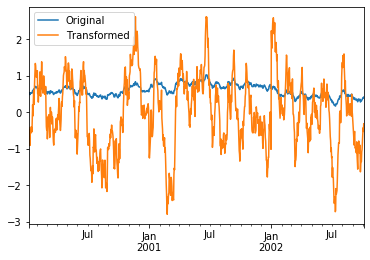

In [264]:
pd.DataFrame({'Original': ts, 'Transformed': transformed}).plot()

In [265]:
max = ts.groupby(lambda x: x.year).transform('max')
min = ts.groupby(lambda x: x.year).transform('min')
max - min

2000-01-08    0.480507
2000-01-09    0.480507
2000-01-10    0.480507
2000-01-11    0.480507
2000-01-12    0.480507
                ...   
2002-09-30    0.542332
2002-10-01    0.542332
2002-10-02    0.542332
2002-10-03    0.542332
2002-10-04    0.542332
Freq: D, Length: 1001, dtype: float64

In [ ]:
**Window and resample operations**

In [266]:
df_re = pd.DataFrame({'A': [1] * 10 + [5] * 10,
                      'B': np.arange(20)})
df_re

,A,B
0,1,0
1,1,1
2,1,2
3,1,3
4,1,4
5,1,5
6,1,6
7,1,7
8,1,8
9,1,9


The example below will apply the rolling() method on the samples of the column B based on the groups of column A.

In [267]:
df_re.groupby('A').rolling(4).B.mean()

A    
1  0      NaN
   1      NaN
   2      NaN
   3      1.5
   4      2.5
   5      3.5
   6      4.5
   7      5.5
   8      6.5
   9      7.5
5  10     NaN
   11     NaN
   12     NaN
   13    11.5
   14    12.5
   15    13.5
   16    14.5
   17    15.5
   18    16.5
   19    17.5
Name: B, dtype: float64

The expanding() method will accumulate a given operation (sum() in the example) for all the members of each particular group.

In [269]:
df_re.groupby('A').expanding().sum()[['B']]

B
A          
1 0     0.0
  1     1.0
  2     3.0
  3     6.0
  4    10.0
  5    15.0
  6    21.0
  7    28.0
  8    36.0
  9    45.0
5 10   10.0
  11   21.0
  12   33.0
  13   46.0
  14   60.0
  15   75.0
  16   91.0
  17  108.0
  18  126.0
  19  145.0

Suppose you want to use the resample() method to get a daily frequency in each group of your dataframe and wish to complete the missing values with the ffill() method.

In [272]:
df_re = pd.DataFrame({
    'date': pd.date_range(start='2016-01-01', periods=4, freq='W'),
    'group': [1, 1, 2, 2],
    'val': [5, 6, 7, 8]
}).set_index('date')
df_re

,group,val
date,,
2016-01-03,1,5
2016-01-10,1,6
2016-01-17,2,7
2016-01-24,2,8


In [274]:
df_re.groupby('group').resample('1D').ffill()[['val']]

val
group date           
1     2016-01-03    5
      2016-01-04    5
      2016-01-05    5
      2016-01-06    5
      2016-01-07    5
      2016-01-08    5
      2016-01-09    5
      2016-01-10    6
2     2016-01-17    7
      2016-01-18    7
      2016-01-19    7
      2016-01-20    7
      2016-01-21    7
      2016-01-22    7
      2016-01-23    7
      2016-01-24    8

**Pandas Map/Reduce**

In [ ]:
# TODO

### 3.2.4 Group By: Filtration

The filter method returns a subset of the original object. Suppose we want to take only elements that belong to groups with a group sum greater than 2.

In [275]:
dff = pd.DataFrame({'A': np.arange(8), 'B': list('aabbbbcc')})
dff

,A,B
0,0,a
1,1,a
2,2,b
3,3,b
4,4,b
5,5,b
6,6,c
7,7,c


In [288]:
dff.groupby('B').filter(lambda x: len(x) > 2, dropna=True)

,A,B
2,2,b
3,3,b
4,4,b
5,5,b


In [287]:
dfs = pd.DataFrame(dff.groupby('B').apply(lambda x : len(x))).reset_index()
dfs.columns = ['B','longs']
dfs_ = pd.merge(dff, dfs, how='left',on='B')
dfs_[dfs_.longs > 2][['A','B']]

,A,B
2,2,b
3,3,b
4,4,b
5,5,b


**Handling of (un)observed Categorical values**

When using a Categorical grouper (as a single grouper, or as part of multiple groupers), the observed keyword controls whether to return a cartesian product of all possible groupers values (observed=False) or only those that are observed groupers (observed=True).

In [289]:
pd.Series([1, 1, 1]).groupby(
    pd.Categorical(['a', 'a', 'a'], categories=['a', 'b']),
    observed=False).count()

a    3
b    0
dtype: int64

In [290]:
pd.Series([1, 1, 1]).groupby(
    pd.Categorical(['a', 'a', 'a'], categories=['a', 'b']),
    observed=True).count()

a    3
dtype: int64

## 3.3. Merge, join and concatenate

pandas provides various facilities for easily combining together Series or DataFrame with various kinds of set logic for the indexes and relational algebra functionality in the case of join / merge-type operations.

In [294]:
df1 = pd.DataFrame({'A': ['A0', 'A1', 'A2', 'A3'],
                    'B': ['B0', 'B1', 'B2', 'B3'],
                    'C': ['C0', 'C1', 'C2', 'C3'],
                    'D': ['D0', 'D1', 'D2', 'D3']},
                    index=[0, 1, 2, 3])
df1

,A,B,C,D
0,A0,B0,C0,D0
1,A1,B1,C1,D1
2,A2,B2,C2,D2
3,A3,B3,C3,D3


In [295]:
df2 = pd.DataFrame({'A': ['A4', 'A5', 'A6', 'A7'],
                    'B': ['B4', 'B5', 'B6', 'B7'],
                    'C': ['C4', 'C5', 'C6', 'C7'],
                    'D': ['D4', 'D5', 'D6', 'D7']},
                    index=[4, 5, 6, 7])
df2

,A,B,C,D
4,A4,B4,C4,D4
5,A5,B5,C5,D5
6,A6,B6,C6,D6
7,A7,B7,C7,D7


In [296]:
df3 = pd.DataFrame({'A': ['A8', 'A9', 'A10', 'A11'],
                    'B': ['B8', 'B9', 'B10', 'B11'],
                    'C': ['C8', 'C9', 'C10', 'C11'],
                    'D': ['D8', 'D9', 'D10', 'D11']},
                    index=[8, 9, 10, 11])
df3

,A,B,C,D
8,A8,B8,C8,D8
9,A9,B9,C9,D9
10,A10,B10,C10,D10
11,A11,B11,C11,D11


In [303]:
df4 = pd.DataFrame({'B': ['B2', 'B3', 'B6', 'B7'],
                    'D': ['D2', 'D3', 'D6', 'D7'],
                    'F': ['F2', 'F3', 'F6', 'F7']},
                    index=[2, 3, 6, 7])
df4

,B,D,F
2,B2,D2,F2
3,B3,D3,F3
6,B6,D6,F6
7,B7,D7,F7


### 3.3.1. Concatenating objects

The concat() function (in the main pandas namespace) does all of the heavy lifting of performing concatenation operations along an axis while performing optional set logic (union or intersection) of the indexes (if any) on the other axes. Note that I say “if any” because there is only a single possible axis of concatenation for Series.


Like its sibling function on ndarrays, numpy.concatenate, pandas.concat takes a list or dict of homogeneously-typed objects and concatenates them with some configurable handling of “what to do with the other axes”:

```
pd.concat(objs, axis=0, join='outer', ignore_index=False, keys=None,
          levels=None, names=None, verify_integrity=False, copy=True)
```

- objs : a sequence or mapping of Series or DataFrame objects. If a dict is passed, the sorted keys will be used as the keys argument, unless it is passed, in which case the values will be selected (see below). Any None objects will be dropped silently unless they are all None in which case a ValueError will be raised.

- axis : {0, 1, …}, default 0. The axis to concatenate along.

- join : {‘inner’, ‘outer’}, default ‘outer’. How to handle indexes on other axis(es). Outer for union and inner for intersection.

- ignore_index : boolean, default False. If True, do not use the index values on the concatenation axis. The resulting axis will be labeled 0, …, n - 1. This is useful if you are concatenating objects where the concatenation axis does not have meaningful indexing information. Note the index values on the other axes are still respected in the join.

- keys : sequence, default None. Construct hierarchical index using the passed keys as the outermost level. If multiple levels passed, should contain tuples.

- levels : list of sequences, default None. Specific levels (unique values) to use for constructing a MultiIndex. Otherwise they will be inferred from the keys.

- names : list, default None. Names for the levels in the resulting hierarchical index.

- verify_integrity : boolean, default False. Check whether the new concatenated axis contains duplicates. This can be very expensive relative to the actual data concatenation.

- copy : boolean, default True. If False, do not copy data unnecessarily.

In [293]:
pd.concat([df1, df2, df3])

,A,B,C,D
0,A0,B0,C0,D0
1,A1,B1,C1,D1
2,A2,B2,C2,D2
3,A3,B3,C3,D3
4,A4,B4,C4,D4
5,A5,B5,C5,D5
6,A6,B6,C6,D6
7,A7,B7,C7,D7
8,A8,B8,C8,D8
9,A9,B9,C9,D9


In [300]:
result = pd.concat([df1, df2, df3], keys=['x', 'y', 'z'])
result

A    B    C    D
x 0    A0   B0   C0   D0
  1    A1   B1   C1   D1
  2    A2   B2   C2   D2
  3    A3   B3   C3   D3
y 4    A4   B4   C4   D4
  5    A5   B5   C5   D5
  6    A6   B6   C6   D6
  7    A7   B7   C7   D7
z 8    A8   B8   C8   D8
  9    A9   B9   C9   D9
  10  A10  B10  C10  D10
  11  A11  B11  C11  D11

In [301]:
result.loc['y']

,A,B,C,D
4,A4,B4,C4,D4
5,A5,B5,C5,D5
6,A6,B6,C6,D6
7,A7,B7,C7,D7


**Set logic on the other axes**

When gluing together multiple DataFrames, you have a choice of how to handle the other axes (other than the one being concatenated). This can be done in the following two ways:

- Take the union of them all, join='outer'. This is the default option as it results in zero information loss.

- Take the intersection, join='inner'.

In [304]:
pd.concat([df1, df4], axis=1)

,A,B,C,D,B,D,F
0,A0,B0,C0,D0,NaN,NaN,NaN
1,A1,B1,C1,D1,NaN,NaN,NaN
2,A2,B2,C2,D2,B2,D2,F2
3,A3,B3,C3,D3,B3,D3,F3
6,NaN,NaN,NaN,NaN,B6,D6,F6
7,NaN,NaN,NaN,NaN,B7,D7,F7


In [306]:
pd.concat([df1, df4], axis=1, join='inner')

,A,B,C,D,B,D,F
2,A2,B2,C2,D2,B2,D2,F2
3,A3,B3,C3,D3,B3,D3,F3


In [307]:
pd.concat([df1, df4], axis=1).reindex(df1.index)

,A,B,C,D,B,D,F
0,A0,B0,C0,D0,NaN,NaN,NaN
1,A1,B1,C1,D1,NaN,NaN,NaN
2,A2,B2,C2,D2,B2,D2,F2
3,A3,B3,C3,D3,B3,D3,F3


In [308]:
pd.concat([df1, df4], axis=1).reindex(df4.index)

,A,B,C,D,B,D,F
2,A2,B2,C2,D2,B2,D2,F2
3,A3,B3,C3,D3,B3,D3,F3
6,NaN,NaN,NaN,NaN,B6,D6,F6
7,NaN,NaN,NaN,NaN,B7,D7,F7


**Concatenating using append**

A useful shortcut to concat() are the append() instance methods on Series and DataFrame. These methods actually predated concat. They concatenate along axis=0, namely the index.

Unlike the append() method, which appends to the original list and returns None, append() here does not modify df1 and returns its copy with df2 appended.

In [309]:
df1.append(df2)

,A,B,C,D
0,A0,B0,C0,D0
1,A1,B1,C1,D1
2,A2,B2,C2,D2
3,A3,B3,C3,D3
4,A4,B4,C4,D4
5,A5,B5,C5,D5
6,A6,B6,C6,D6
7,A7,B7,C7,D7


In [311]:
df1.append(df4, sort=False)

,A,B,C,D,F
0,A0,B0,C0,D0,NaN
1,A1,B1,C1,D1,NaN
2,A2,B2,C2,D2,NaN
3,A3,B3,C3,D3,NaN
2,NaN,B2,NaN,D2,F2
3,NaN,B3,NaN,D3,F3
6,NaN,B6,NaN,D6,F6
7,NaN,B7,NaN,D7,F7


In [314]:
pd.concat([df1, df4], axis=0)

,A,B,C,D,F
0,A0,B0,C0,D0,NaN
1,A1,B1,C1,D1,NaN
2,A2,B2,C2,D2,NaN
3,A3,B3,C3,D3,NaN
2,NaN,B2,NaN,D2,F2
3,NaN,B3,NaN,D3,F3
6,NaN,B6,NaN,D6,F6
7,NaN,B7,NaN,D7,F7


**Ignoring indexes on the concatenation axis**

For DataFrame objects which don’t have a meaningful index, you may wish to append them and ignore the fact that they may have overlapping indexes. To do this, use the ignore_index argument:

In [316]:
pd.concat([df1, df4], ignore_index=False, sort=False)

,A,B,C,D,F
0,A0,B0,C0,D0,NaN
1,A1,B1,C1,D1,NaN
2,A2,B2,C2,D2,NaN
3,A3,B3,C3,D3,NaN
2,NaN,B2,NaN,D2,F2
3,NaN,B3,NaN,D3,F3
6,NaN,B6,NaN,D6,F6
7,NaN,B7,NaN,D7,F7


In [317]:
pd.concat([df1, df4], ignore_index=True, sort=False)

,A,B,C,D,F
0,A0,B0,C0,D0,NaN
1,A1,B1,C1,D1,NaN
2,A2,B2,C2,D2,NaN
3,A3,B3,C3,D3,NaN
4,NaN,B2,NaN,D2,F2
5,NaN,B3,NaN,D3,F3
6,NaN,B6,NaN,D6,F6
7,NaN,B7,NaN,D7,F7


**Concatenating with mixed ndims**

In [318]:
s1 = pd.Series(['X0', 'X1', 'X2', 'X3'], name='X')
s1

0    X0
1    X1
2    X2
3    X3
Name: X, dtype: object

In [321]:
pd.concat([df1, s1, s1], axis=1)

,A,B,C,D,X,X
0,A0,B0,C0,D0,X0,X0
1,A1,B1,C1,D1,X1,X1
2,A2,B2,C2,D2,X2,X2
3,A3,B3,C3,D3,X3,X3


In [324]:
pd.concat([df1, s1, s1], axis=1, ignore_index=True)

,0,1,2,3,4,5
0,A0,B0,C0,D0,X0,X0
1,A1,B1,C1,D1,X1,X1
2,A2,B2,C2,D2,X2,X2
3,A3,B3,C3,D3,X3,X3


In [323]:
pd.concat([df1, s1, s1], axis=1, keys=['red', 'blue', 'yellow'])

red             blue yellow
    A   B   C   D    X      X
0  A0  B0  C0  D0   X0     X0
1  A1  B1  C1  D1   X1     X1
2  A2  B2  C2  D2   X2     X2
3  A3  B3  C3  D3   X3     X3

You can also pass a dict to concat in which case the dict keys will be used for the keys argument (unless other keys are specified):

In [325]:
pieces = {'x': df1, 'y': df2, 'z': df3}

In [326]:
pd.concat(pieces)

A    B    C    D
x 0    A0   B0   C0   D0
  1    A1   B1   C1   D1
  2    A2   B2   C2   D2
  3    A3   B3   C3   D3
y 4    A4   B4   C4   D4
  5    A5   B5   C5   D5
  6    A6   B6   C6   D6
  7    A7   B7   C7   D7
z 8    A8   B8   C8   D8
  9    A9   B9   C9   D9
  10  A10  B10  C10  D10
  11  A11  B11  C11  D11

**Appending rows to a DataFrame**

In [331]:
s2 = pd.Series(['X0', 'X1', 'X2', 'X3'], index=['A', 'B', 'C', 'D'])
s2

A    X0
B    X1
C    X2
D    X3
dtype: object

In [335]:
s1

0    X0
1    X1
2    X2
3    X3
Name: X, dtype: object

In [336]:
df1.append(s1, ignore_index=True)

,A,B,C,D,0,1,2,3
0,A0,B0,C0,D0,NaN,NaN,NaN,NaN
1,A1,B1,C1,D1,NaN,NaN,NaN,NaN
2,A2,B2,C2,D2,NaN,NaN,NaN,NaN
3,A3,B3,C3,D3,NaN,NaN,NaN,NaN
4,NaN,NaN,NaN,NaN,X0,X1,X2,X3


In [337]:
df1.append(s2, ignore_index=True)

,A,B,C,D
0,A0,B0,C0,D0
1,A1,B1,C1,D1
2,A2,B2,C2,D2
3,A3,B3,C3,D3
4,X0,X1,X2,X3


### 3.3.2. Merge and Join

pandas has full-featured, high performance in-memory join operations idiomatically very similar to relational databases like SQL. These methods perform significantly better (in some cases well over an order of magnitude better) than other open source implementations (like base::merge.data.frame in R). The reason for this is careful algorithmic design and the internal layout of the data in DataFrame.

Users who are familiar with SQL but new to pandas might be interested in a comparison with SQL.

pandas provides a single function, merge(), as the entry point for all standard database join operations between DataFrame or named Series objects:

```
pd.merge(left, right, how='inner', on=None, left_on=None, right_on=None,
         left_index=False, right_index=False, sort=True,
         suffixes=('_x', '_y'), copy=True, indicator=False,
         validate=None)
```

**Brief primer on merge methods (relational algebra)**

Experienced users of relational databases like SQL will be familiar with the terminology used to describe join operations between two SQL-table like structures (DataFrame objects). There are several cases to consider which are very important to understand:


![](./images/join-or-merge-in-python-pandas.png)


- one-to-one joins: for example when joining two DataFrame objects on their indexes (which must contain unique values).

- many-to-one joins: for example when joining an index (unique) to one or more columns in a different DataFrame.

- many-to-many joins: joining columns on columns.






In [339]:
left = pd.DataFrame({'key': ['K0', 'K1', 'K2', 'K3'],
                     'A': ['A0', 'A1', 'A2', 'A3'],
                     'B': ['B0', 'B1', 'B2', 'B3']})
left

,key,A,B
0,K0,A0,B0
1,K1,A1,B1
2,K2,A2,B2
3,K3,A3,B3


In [340]:
right = pd.DataFrame({'key': ['K0', 'K1', 'K2', 'K3'],
                      'C': ['C0', 'C1', 'C2', 'C3'],
                      'D': ['D0', 'D1', 'D2', 'D3']})
right

,key,C,D
0,K0,C0,D0
1,K1,C1,D1
2,K2,C2,D2
3,K3,C3,D3


It is worth spending some time understanding the result of the many-to-many join case. In SQL / standard relational algebra, if a key combination appears more than once in both tables, the resulting table will have the Cartesian product of the associated data. Here is a very basic example with one unique key combination:

In [341]:
pd.merge(left, right, on='key')

,key,A,B,C,D
0,K0,A0,B0,C0,D0
1,K1,A1,B1,C1,D1
2,K2,A2,B2,C2,D2
3,K3,A3,B3,C3,D3


Here is a more complicated example with multiple join keys. Only the keys appearing in left and right are present (the intersection), since how='inner' by default.

In [342]:
left = pd.DataFrame({'key1': ['K0', 'K0', 'K1', 'K2'],
                     'key2': ['K0', 'K1', 'K0', 'K1'],
                     'A': ['A0', 'A1', 'A2', 'A3'],
                     'B': ['B0', 'B1', 'B2', 'B3']})
left

,key1,key2,A,B
0,K0,K0,A0,B0
1,K0,K1,A1,B1
2,K1,K0,A2,B2
3,K2,K1,A3,B3


In [343]:
right = pd.DataFrame({'key1': ['K0', 'K1', 'K1', 'K2'],
                      'key2': ['K0', 'K0', 'K0', 'K0'],
                      'C': ['C0', 'C1', 'C2', 'C3'],
                      'D': ['D0', 'D1', 'D2', 'D3']})
right

,key1,key2,C,D
0,K0,K0,C0,D0
1,K1,K0,C1,D1
2,K1,K0,C2,D2
3,K2,K0,C3,D3


In [345]:
result = pd.merge(left, right, on=['key1', 'key2'])
result

,key1,key2,A,B,C,D
0,K0,K0,A0,B0,C0,D0
1,K1,K0,A2,B2,C1,D1
2,K1,K0,A2,B2,C2,D2


The how argument to merge specifies how to determine which keys are to be included in the resulting table. If a key combination does not appear in either the left or right tables, the values in the joined table will be NA. Here is a summary of the how options and their SQL equivalent names:

![](./images/merge-how.png)

In [346]:
pd.merge(left, right, how='left', on=['key1', 'key2'])

,key1,key2,A,B,C,D
0,K0,K0,A0,B0,C0,D0
1,K0,K1,A1,B1,NaN,NaN
2,K1,K0,A2,B2,C1,D1
3,K1,K0,A2,B2,C2,D2
4,K2,K1,A3,B3,NaN,NaN


In [347]:
pd.merge(left, right, how='right', on=['key1', 'key2'])

,key1,key2,A,B,C,D
0,K0,K0,A0,B0,C0,D0
1,K1,K0,A2,B2,C1,D1
2,K1,K0,A2,B2,C2,D2
3,K2,K0,NaN,NaN,C3,D3


In [348]:
pd.merge(left, right, how='outer', on=['key1', 'key2'])

,key1,key2,A,B,C,D
0,K0,K0,A0,B0,C0,D0
1,K0,K1,A1,B1,NaN,NaN
2,K1,K0,A2,B2,C1,D1
3,K1,K0,A2,B2,C2,D2
4,K2,K1,A3,B3,NaN,NaN
5,K2,K0,NaN,NaN,C3,D3


**Checking for duplicate keys**

In [350]:
left = pd.DataFrame({'A': [1, 2], 'B': [2, 2]})
left

,A,B
0,1,2
1,2,2


In [351]:
right = pd.DataFrame({'A': [4, 5, 6], 'B': [2, 2, 2]})
right

,A,B
0,4,2
1,5,2
2,6,2


Here is another example with duplicate join keys in DataFrames:

In [352]:
pd.merge(left, right, on='B', how='outer')

,A_x,B,A_y
0,1,2,4
1,1,2,5
2,1,2,6
3,2,2,4
4,2,2,5
5,2,2,6


In the following example, there are duplicate values of B in the right DataFrame. As this is not a one-to-one merge – as specified in the validate argument – an exception will be raised.

In [356]:
left = pd.DataFrame({'A' : [1,2], 'B' : [1, 2]})
right = pd.DataFrame({'A' : [4,5,6], 'B': [2, 2, 2]})

In [357]:
try:
    pd.merge(left, right, on='B', how='outer', validate="one_to_one") 
except:
    print("MergeError: Merge keys are not unique in right dataset; not a one-to-one merge")

MergeError: Merge keys are not unique in right dataset; not a one-to-one merge


If the user is aware of the duplicates in the right DataFrame but wants to ensure there are no duplicates in the left DataFrame, one can use the validate='one_to_many' argument instead, which will not raise an exception.

In [358]:
pd.merge(left, right, on='B', how='outer', validate="one_to_many")

,A_x,B,A_y
0,1,1,NaN
1,2,2,4.0
2,2,2,5.0
3,2,2,6.0


**The merge indicator**

merge() accepts the argument indicator. If True, a Categorical-type column called _merge will be added to the output object that takes on values:

- Merge key only in 'left' frame : left_only
- Merge key only in 'right' frame : right_only
- Merge key in both frames : both

In [359]:
df1 = pd.DataFrame({'col1': [0, 1], 'col_left': ['a', 'b']})
df1

,col1,col_left
0,0,a
1,1,b


In [360]:
df2 = pd.DataFrame({'col1': [1, 2, 2], 'col_right': [2, 2, 2]})
df2

,col1,col_right
0,1,2
1,2,2
2,2,2


In [361]:
pd.merge(df1, df2, on='col1', how='outer', indicator='indicator_column')

,col1,col_left,col_right,indicator_column
0,0,a,NaN,left_only
1,1,b,2.0,both
2,2,NaN,2.0,right_only
3,2,NaN,2.0,right_only


**Merge dtypes**

Merging will preserve the dtype of the join keys.

Of course if you have missing values that are introduced, then the resulting dtype will be upcast.

In [365]:
pd.merge(df1, df2, how='outer', on='col1').dtypes

col1           int64
col_left      object
col_right    float64
dtype: object

Merging will preserve category dtypes of the mergands.

In [366]:
from pandas.api.types import CategoricalDtype

X = pd.Series(np.random.choice(['foo', 'bar'], size=(10,)))
X = X.astype(CategoricalDtype(categories=['foo', 'bar']))

left = pd.DataFrame({'X': X,
                     'Y': np.random.choice(['one', 'two', 'three'], size=(10,))})
left

,X,Y
0,bar,three
1,foo,two
2,bar,three
3,bar,three
4,bar,two
5,bar,three
6,foo,one
7,bar,two
8,bar,two
9,foo,three


In [367]:
left.dtypes

X    category
Y      object
dtype: object

In [368]:
right = pd.DataFrame({'X': pd.Series(['foo', 'bar'], dtype=CategoricalDtype(['foo', 'bar'])),
                      'Z': [1, 2]})
right

,X,Z
0,foo,1
1,bar,2


In [369]:
right.dtypes

X    category
Z       int64
dtype: object

In [371]:
result = pd.merge(left, right, how='outer')
result

,X,Y,Z
0,bar,three,2
1,bar,three,2
2,bar,three,2
3,bar,two,2
4,bar,three,2
5,bar,two,2
6,bar,two,2
7,foo,two,1
8,foo,one,1
9,foo,three,1


In [372]:
result.dtypes

X    category
Y      object
Z       int64
dtype: object

The category dtypes must be exactly the same, meaning the same categories and the ordered attribute. Otherwise the result will coerce to the categories’ dtype.

**Joining on index**

DataFrame.join() is a convenient method for combining the columns of two potentially differently-indexed DataFrames into a single result DataFrame. 

In [373]:
left = pd.DataFrame({'A': ['A0', 'A1', 'A2'],
                     'B': ['B0', 'B1', 'B2']},
                     index=['K0', 'K1', 'K2'])
left

,A,B
K0,A0,B0
K1,A1,B1
K2,A2,B2


In [374]:
right = pd.DataFrame({'C': ['C0', 'C2', 'C3'],
                      'D': ['D0', 'D2', 'D3']},
                      index=['K0', 'K2', 'K3'])
right

,C,D
K0,C0,D0
K2,C2,D2
K3,C3,D3


In [375]:
left.join(right, how='inner')

,A,B,C,D
K0,A0,B0,C0,D0
K2,A2,B2,C2,D2


In [376]:
left.join(right, how='outer')

,A,B,C,D
K0,A0,B0,C0,D0
K1,A1,B1,NaN,NaN
K2,A2,B2,C2,D2
K3,NaN,NaN,C3,D3


The data alignment here is on the indexes (row labels). This same behavior can be achieved using merge plus additional arguments instructing it to use the indexes:

In [377]:
pd.merge(left, right, left_index=True, right_index=True, how='outer')

,A,B,C,D
K0,A0,B0,C0,D0
K1,A1,B1,NaN,NaN
K2,A2,B2,C2,D2
K3,NaN,NaN,C3,D3


**Joining key columns on an index**

In [378]:
left = pd.DataFrame({'A': ['A0', 'A1', 'A2', 'A3'],
                     'B': ['B0', 'B1', 'B2', 'B3'],
                     'key': ['K0', 'K1', 'K0', 'K1']})

right = pd.DataFrame({'C': ['C0', 'C1'],
                      'D': ['D0', 'D1']},
                      index=['K0', 'K1'])

result = left.join(right, on='key')
result

,A,B,key,C,D
0,A0,B0,K0,C0,D0
1,A1,B1,K1,C1,D1
2,A2,B2,K0,C0,D0
3,A3,B3,K1,C1,D1


**Joining a single Index to a MultiIndex**

In [379]:
left = pd.DataFrame({'A': ['A0', 'A1', 'A2'],
                     'B': ['B0', 'B1', 'B2']},
                     index=pd.Index(['K0', 'K1', 'K2'], name='key'))
left

,A,B
key,,
K0,A0,B0
K1,A1,B1
K2,A2,B2


In [380]:
index = pd.MultiIndex.from_tuples([('K0', 'Y0'), ('K1', 'Y1'),
                                   ('K2', 'Y2'), ('K2', 'Y3')],
                                   names=['key', 'Y'])

right = pd.DataFrame({'C': ['C0', 'C1', 'C2', 'C3'],
                      'D': ['D0', 'D1', 'D2', 'D3']},
                      index=index)
right

C   D
key Y         
K0  Y0  C0  D0
K1  Y1  C1  D1
K2  Y2  C2  D2
    Y3  C3  D3

In [382]:
left.join(right, how='inner')

A   B   C   D
key Y                 
K0  Y0  A0  B0  C0  D0
K1  Y1  A1  B1  C1  D1
K2  Y2  A2  B2  C2  D2
    Y3  A2  B2  C3  D3

In [384]:
pd.merge(
    left.reset_index(), 
    right.reset_index(),
    on=['key'], 
    how='inner'
).set_index(['key','Y'])

A   B   C   D
key Y                 
K0  Y0  A0  B0  C0  D0
K1  Y1  A1  B1  C1  D1
K2  Y2  A2  B2  C2  D2
    Y3  A2  B2  C3  D3

**Joining with two MultiIndexes**

In [386]:
leftindex = pd.MultiIndex.from_product(
    [list('abc'), list('xy'), [1, 2]],
    names=['abc', 'xy', 'num'])

left = pd.DataFrame({'v1': range(12)}, index=leftindex)
left

v1
abc xy num    
a   x  1     0
       2     1
    y  1     2
       2     3
b   x  1     4
       2     5
    y  1     6
       2     7
c   x  1     8
       2     9
    y  1    10
       2    11

In [385]:
rightindex = pd.MultiIndex.from_product(
    [list('abc'), list('xy')],
    names=['abc', 'xy'])

right = pd.DataFrame({'v2': [100 * i for i in range(1, 7)]}, index=rightindex)
right

v2
abc xy     
a   x   100
    y   200
b   x   300
    y   400
c   x   500
    y   600

In [387]:
left.join(right, on=['abc', 'xy'], how='inner')

v1   v2
abc xy num         
a   x  1     0  100
       2     1  100
    y  1     2  200
       2     3  200
b   x  1     4  300
       2     5  300
    y  1     6  400
       2     7  400
c   x  1     8  500
       2     9  500
    y  1    10  600
       2    11  600

**Merging on a combination of columns and index levels**

Strings passed as the on, left_on, and right_on parameters may refer to either column names or index level names. This enables merging DataFrame instances on a combination of index levels and columns without resetting indexes.

In [388]:
left_index = pd.Index(['K0', 'K0', 'K1', 'K2'], name='key1')
left = pd.DataFrame({'A': ['A0', 'A1', 'A2', 'A3'],
                     'B': ['B0', 'B1', 'B2', 'B3'],
                     'key2': ['K0', 'K1', 'K0', 'K1']},
                     index=left_index)

right_index = pd.Index(['K0', 'K1', 'K2', 'K2'], name='key1')
right = pd.DataFrame({'C': ['C0', 'C1', 'C2', 'C3'],
                      'D': ['D0', 'D1', 'D2', 'D3'],
                      'key2': ['K0', 'K0', 'K0', 'K1']},
                      index=right_index)

result = left.merge(right, on=['key1', 'key2'])
result

,A,B,key2,C,D
key1,,,,,
K0,A0,B0,K0,C0,D0
K1,A2,B2,K0,C1,D1
K2,A3,B3,K1,C3,D3


In [389]:
left.merge(right, on=['key1', 'key2'], how='outer')

,A,B,key2,C,D
key1,,,,,
K0,A0,B0,K0,C0,D0
K0,A1,B1,K1,NaN,NaN
K1,A2,B2,K0,C1,D1
K2,A3,B3,K1,C3,D3
K2,NaN,NaN,K0,C2,D2


When DataFrames are merged on a string that matches an index level in both frames, the index level is preserved as an index level in the resulting DataFrame.

**Overlaping value on columns**

The merge suffixes argument takes a tuple of list of strings to append to overlapping column names in the input DataFrames to disambiguate the result columns:

In [400]:
left = pd.DataFrame({'k': ['K0', 'K1', 'K2'], 'v': [1, 2, 3]})
left

,k,v
0,K0,1
1,K1,2
2,K2,3


In [401]:
right = pd.DataFrame({'k': ['K0', 'K0', 'K3'], 'v': [4, 5, 6]})
right

,k,v
0,K0,4
1,K0,5
2,K3,6


In [391]:
pd.merge(left, right, on='k', suffixes=['_l', '_r'])

,k,v_l,v_r
0,K0,1,4
1,K0,1,5


**Joining multiple DataFrames**

In [402]:
right2 = pd.DataFrame({'v': [7, 8, 9]}, index=['K1', 'K1', 'K2'])
right2

,v
K1,7
K1,8
K2,9


In [403]:
left.set_index('k').join([right.set_index('k'), right2])

,v_x,v_y,v
K0,1,4.0,NaN
K0,1,5.0,NaN
K1,2,NaN,7.0
K1,2,NaN,8.0
K2,3,NaN,9.0


**Timeseries friendly merging**

*Merging ordered data*

A merge_ordered() function allows combining time series and other ordered data. In particular it has an optional fill_method keyword to fill/interpolate missing data:

In [404]:
left = pd.DataFrame({'k': ['K0', 'K1', 'K1', 'K2'],
                     'lv': [1, 2, 3, 4],
                     's': ['a', 'b', 'c', 'd']})

right = pd.DataFrame({'k': ['K1', 'K2', 'K4'],
                      'rv': [1, 2, 3]})

In [405]:
pd.merge_ordered(left, right, fill_method='ffill', left_by='s')

,k,lv,s,rv
0,K0,1.0,a,NaN
1,K1,1.0,a,1.0
2,K2,1.0,a,2.0
3,K4,1.0,a,3.0
4,K1,2.0,b,1.0
5,K2,2.0,b,2.0
6,K4,2.0,b,3.0
7,K1,3.0,c,1.0
8,K2,3.0,c,2.0
9,K4,3.0,c,3.0


*Merging asof*

A merge_asof() is similar to an ordered left-join except that we match on nearest key rather than equal keys. For each row in the left DataFrame, we select the last row in the right DataFrame whose on key is less than the left’s key. Both DataFrames must be sorted by the key.

Optionally an asof merge can perform a group-wise merge. This matches the by key equally, in addition to the nearest match on the on key.

## 3.4. Reshaping and pivot tables

In [415]:
df = pd.read_csv("./data/reshape.csv")
df

,date,variable,value
0,2000-01-03,A,0.469112
1,2000-01-04,A,-0.282863
2,2000-01-05,A,-1.509059
3,2000-01-03,B,-1.135632
4,2000-01-04,B,1.212112
5,2000-01-05,B,-0.173215
6,2000-01-03,C,0.119209
7,2000-01-04,C,-1.044236
8,2000-01-05,C,-0.861849
9,2000-01-03,D,-2.104569


### 3.4.1. Reshaping by pivoting DataFrame objects

![](./images/pivot.png)

In [416]:
df[df['variable'] == 'A']

,date,variable,value
0,2000-01-03,A,0.469112
1,2000-01-04,A,-0.282863
2,2000-01-05,A,-1.509059


In [417]:
df.pivot(index='date', columns='variable', values='value')

variable,A,B,C,D
date,,,,
2000-01-03,0.469112,-1.135632,0.119209,-2.104569
2000-01-04,-0.282863,1.212112,-1.044236,-0.494929
2000-01-05,-1.509059,-0.173215,-0.861849,1.071804


In [419]:
df['value2'] = df['value'] * 2

In [421]:
pivoted = df.pivot(index='date', columns='variable')
pivoted

value                                  value2            \
variable           A         B         C         D         A         B   
date                                                                     
2000-01-03  0.469112 -1.135632  0.119209 -2.104569  0.938224 -2.271264   
2000-01-04 -0.282863  1.212112 -1.044236 -0.494929 -0.565726  2.424224   
2000-01-05 -1.509059 -0.173215 -0.861849  1.071804 -3.018118 -0.346430   

                                
variable           C         D  
date                            
2000-01-03  0.238418 -4.209138  
2000-01-04 -2.088472 -0.989858  
2000-01-05 -1.723698  2.143608

In [422]:
pivoted['value2']

variable,A,B,C,D
date,,,,
2000-01-03,0.938224,-2.271264,0.238418,-4.209138
2000-01-04,-0.565726,2.424224,-2.088472,-0.989858
2000-01-05,-3.018118,-0.346430,-1.723698,2.143608


### 3.4.2. Reshaping by stacking and unstacking

Closely related to the pivot() method are the related stack() and unstack() methods available on Series and DataFrame. These methods are designed to work together with MultiIndex objects (see the section on hierarchical indexing). Here are essentially what these methods do:

- stack: “pivot” a level of the (possibly hierarchical) column labels, returning a DataFrame with an index with a new inner-most level of row labels.

- unstack: (inverse operation of stack) “pivot” a level of the (possibly hierarchical) row index to the column axis, producing a reshaped DataFrame with a new inner-most level of column labels.

In [429]:
df_wt_text = pd.read_pickle("./data/df_wt_text.pkl")
df_wt_text.shape

(178532, 35)

In [432]:
df_wt = df_wt_text[
    ['Client_Type','Text_Category','Text_Probability']].copy()
df_wt.head()

,Client_Type,Text_Category,Text_Probability
1,Profesional,numbers,0.993812
6,Profesional,letters,0.125165
9,Profesional,letters,0.001857
10,Profesional,mixed,0.015480
13,Profesional,letters,0.984563


**stacking**
![](./images/stack.png)

In [425]:
tuples = list(zip(*[['bar', 'bar', 'baz', 'baz',
                     'foo', 'foo', 'qux', 'qux'],
                    ['one', 'two', 'one', 'two',
                     'one', 'two', 'one', 'two']]))

index = pd.MultiIndex.from_tuples(tuples, names=['first', 'second'])
df = pd.DataFrame(np.random.randn(8, 2), index=index, columns=['A', 'B'])
df2 = df.copy()
df2

A         B
first second                    
bar   one    -0.278066  0.683596
      two     0.222989  0.364664
baz   one     1.227642  0.578812
      two    -0.950615 -0.453557
foo   one    -1.100578  0.160153
      two     0.777333 -2.384374
qux   one    -0.946012 -0.275603
      two     0.457737 -0.206842

In [426]:
df2.stack()

first  second   
bar    one     A   -0.278066
               B    0.683596
       two     A    0.222989
               B    0.364664
baz    one     A    1.227642
               B    0.578812
       two     A   -0.950615
               B   -0.453557
foo    one     A   -1.100578
               B    0.160153
       two     A    0.777333
               B   -2.384374
qux    one     A   -0.946012
               B   -0.275603
       two     A    0.457737
               B   -0.206842
dtype: float64

**unstacking**
![](./images/unstack.png)

In [438]:
df2.stack().unstack(0)

first          bar       baz       foo       qux
second                                          
one    A -0.278066  1.227642 -1.100578 -0.946012
       B  0.683596  0.578812  0.160153 -0.275603
two    A  0.222989 -0.950615  0.777333  0.457737
       B  0.364664 -0.453557 -2.384374 -0.206842

In [440]:
df_wt.groupby(['Client_Type','Text_Category']).mean().unstack('Client_Type')

Text_Probability            
Client_Type          Particular Profesional
Text_Category                              
letters                0.255319    0.333272
mixed                  0.193462    0.171281
mostly letters         0.135668    0.222609
mostly numbers         0.452151    0.265826
numbers                0.403103    0.448331

**Multiple levels**

In [441]:
columns = pd.MultiIndex.from_tuples([
    ('A', 'cat', 'long'), ('B', 'cat', 'long'),
    ('A', 'dog', 'short'), ('B', 'dog', 'short')],
    names=['exp', 'animal', 'hair_length']
)

df = pd.DataFrame(np.random.randn(4, 4), columns=columns)
df

exp,A,B,A,B
animal,cat,cat,dog,dog
hair_length,long,long,short,short
0,0.202891,0.684222,-1.666868,0.207656
1,-0.765384,-0.835698,-0.284784,-0.102226
2,0.145183,-0.457190,-0.311253,-0.866392
3,-2.669984,-2.624358,-1.110237,-0.353414


In [442]:
df.stack(level=['animal', 'hair_length'])

exp                          A         B
  animal hair_length                    
0 cat    long         0.202891  0.684222
  dog    short       -1.666868  0.207656
1 cat    long        -0.765384 -0.835698
  dog    short       -0.284784 -0.102226
2 cat    long         0.145183 -0.457190
  dog    short       -0.311253 -0.866392
3 cat    long        -2.669984 -2.624358
  dog    short       -1.110237 -0.353414

**Missing data**

Unstacking can result in missing values if subgroups do not have the same set of labels. By default, missing values will be replaced with the default fill value for that data type, NaN for float, NaT for datetimelike, etc. For integer types, by default data will converted to float and missing values will be set to NaN.

In [445]:
df3 = df.stack('animal').iloc[[0, 1, 4, 7], [1, 2]]
df3

exp                 A         B
hair_length     short      long
  animal                       
0 cat             NaN  0.684222
  dog       -1.666868       NaN
2 cat             NaN -0.457190
3 dog       -1.110237       NaN

### 3.4.3. Reshaping by Melt

![](./images/melt.png)

The top-level melt() function and the corresponding DataFrame.melt() are useful to massage a DataFrame into a format where one or more columns are identifier variables, while all other columns, considered measured variables, are “unpivoted” to the row axis, leaving just two non-identifier columns, “variable” and “value”. The names of those columns can be customized by supplying the var_name and value_name parameters.

In [446]:
cheese = pd.DataFrame({'first': ['John', 'Mary'],
                       'last': ['Doe', 'Bo'],
                       'height': [5.5, 6.0],
                       'weight': [130, 150]})
cheese

,first,last,height,weight
0,John,Doe,5.5,130
1,Mary,Bo,6.0,150


In [447]:
cheese.melt(id_vars=['first', 'last'])

,first,last,variable,value
0,John,Doe,height,5.5
1,Mary,Bo,height,6.0
2,John,Doe,weight,130.0
3,Mary,Bo,weight,150.0


In [448]:
cheese.melt(id_vars=['first', 'last'], var_name='quantity')

,first,last,quantity,value
0,John,Doe,height,5.5
1,Mary,Bo,height,6.0
2,John,Doe,weight,130.0
3,Mary,Bo,weight,150.0


Another way to transform is to use the wide_to_long() panel data convenience function. It is less flexible than melt(), but more user-friendly.

In [449]:
dft = pd.DataFrame({"A1970": {0: "a", 1: "b", 2: "c"},
                    "A1980": {0: "d", 1: "e", 2: "f"},
                    "B1970": {0: 2.5, 1: 1.2, 2: .7},
                    "B1980": {0: 3.2, 1: 1.3, 2: .1},
                    "X": dict(zip(range(3), np.random.randn(3)))
                   })
dft["id"] = dft.index
dft

,A1970,A1980,B1970,B1980,X,id
0,a,d,2.5,3.2,0.004372,0
1,b,e,1.2,1.3,0.512635,1
2,c,f,0.7,0.1,0.348004,2


With stubnames [‘A’, ‘B’], this function expects to find one or more group of columns with format A-suffix1, A-suffix2,…, B-suffix1, B-suffix2,… You specify what you want to call this suffix in the resulting long format with j (for example j=’year’)

Each row of these wide variables are assumed to be uniquely identified by i (can be a single column name or a list of column names)

In [450]:
pd.wide_to_long(dft, ["A", "B"], i="id", j="year")

,,X,A,B
id,year,,,
0,1970,0.004372,a,2.5
1,1970,0.512635,b,1.2
2,1970,0.348004,c,0.7
0,1980,0.004372,d,3.2
1,1980,0.512635,e,1.3
2,1980,0.348004,f,0.1


### 3.4.4. Combining with stats and GroupBy

It should be no shock that combining pivot / stack / unstack with GroupBy and the basic Series and DataFrame statistical functions can produce some very expressive and fast data manipulations.

In [461]:
columns = pd.MultiIndex.from_tuples([('A', 'cat'), ('B', 'dog'),
                                     ('B', 'cat'), ('A', 'dog')],
                                    names=['exp', 'animal'])
index = pd.MultiIndex.from_product([('bar', 'baz', 'foo', 'qux'),
                                    ('one', 'two')],
                                   names=['first', 'second'])
df = pd.DataFrame(np.random.randn(8, 4), index=index, columns=columns)
df

exp                  A         B                   A
animal             cat       dog       cat       dog
first second                                        
bar   one    -1.891291 -0.714001  0.224927 -0.759322
      two     1.294897 -0.371964  0.785063 -0.480733
baz   one     2.032428 -0.250371  0.227328  1.338915
      two     0.069132  0.824151 -0.355884 -0.933700
foo   one    -0.470995  0.822600 -0.283148 -2.742975
      two     0.870709 -0.248244 -0.406535 -0.038581
qux   one    -1.593470  0.302582 -0.780010  0.109861
      two     2.658674 -0.517755  0.955280  0.171889

In [462]:
df.stack().mean(1).unstack()

animal             cat       dog
first second                    
bar   one    -0.833182 -0.736661
      two     1.039980 -0.426348
baz   one     1.129878  0.544272
      two    -0.143376 -0.054774
foo   one    -0.377072 -0.960187
      two     0.232087 -0.143413
qux   one    -1.186740  0.206221
      two     1.806977 -0.172933

In [463]:
df.groupby(level=0, axis=1).mean()

exp                  A         B
first second                    
bar   one    -1.325307 -0.244537
      two     0.407082  0.206549
baz   one     1.685671 -0.011522
      two    -0.432284  0.234134
foo   one    -1.606985  0.269726
      two     0.416064 -0.327390
qux   one    -0.741805 -0.238714
      two     1.415282  0.218763

### 3.4.5. Pivot Tables

While pivot() provides general purpose pivoting with various data types (strings, numerics, etc.), pandas also provides pivot_table() for pivoting with aggregation of numeric data.

The function pivot_table() can be used to create spreadsheet-style pivot tables. See the cookbook for some advanced strategies.

It takes a number of arguments:

- data: a DataFrame object.

- values: a column or a list of columns to aggregate.

- index: a column, Grouper, array which has the same length as data, or list of them. Keys to group by on the pivot table index. If an array is passed, it is being used as the same manner as column values.

- columns: a column, Grouper, array which has the same length as data, or list of them. Keys to group by on the pivot table column. If an array is passed, it is being used as the same manner as column values.

aggfunc: function to use for aggregation, defaulting to numpy.mean.

In [464]:
import datetime

df = pd.DataFrame({'A': ['one', 'one', 'two', 'three'] * 6,
                   'B': ['A', 'B', 'C'] * 8,
                   'C': ['foo', 'foo', 'foo', 'bar', 'bar', 'bar'] * 4,
                   'D': np.random.randn(24),
                   'E': np.random.randn(24),
                   'F': [datetime.datetime(2013, i, 1) for i in range(1, 13)]
                    + [datetime.datetime(2013, i, 15) for i in range(1, 13)]})
df

,A,B,C,D,E,F
0,one,A,foo,-0.271130,-1.113325,2013-01-01
1,one,B,foo,-0.792506,-1.541993,2013-02-01
2,two,C,foo,-1.055399,0.893939,2013-03-01
3,three,A,bar,-1.598249,-0.402809,2013-04-01
4,one,B,bar,0.944555,0.078238,2013-05-01
5,one,C,bar,-1.703359,-0.516815,2013-06-01
6,two,A,foo,-0.212223,-0.001129,2013-07-01
7,three,B,foo,-2.573363,0.044973,2013-08-01
8,one,C,foo,1.619578,-0.944946,2013-09-01
9,one,A,bar,-0.887352,-0.037312,2013-10-01


In [465]:
pd.pivot_table(df, values='D', index=['A', 'B'], columns=['C'])

C             bar       foo
A     B                    
one   A -0.172386  0.188113
      B  0.627374 -0.111604
      C  0.132093  0.582385
three A -0.213885       NaN
      B       NaN -1.387468
      C -1.212744       NaN
two   A       NaN -0.255040
      B -0.878656       NaN
      C       NaN -0.232130

The result object is a DataFrame having potentially hierarchical indexes on the rows and columns. If the values column name is not given, the pivot table will include all of the data that can be aggregated in an additional level of hierarchy in the columns:

Also, you can use Grouper for index and columns keywords. For detail of Grouper, see Grouping with a Grouper specification.

In [467]:
table = pd.pivot_table(df, values='D', index=pd.Grouper(freq='M', key='F'), columns='C')
table

C,bar,foo
F,,
2013-01-31,NaN,0.188113
2013-02-28,NaN,-0.111604
2013-03-31,NaN,-0.232130
2013-04-30,-0.213885,NaN
2013-05-31,0.627374,NaN
2013-06-30,0.132093,NaN
2013-07-31,NaN,-0.255040
2013-08-31,NaN,-1.387468
2013-09-30,NaN,0.582385


You can render a nice output of the table omitting the missing values by calling to_string if you wish:

In [468]:
print(table.to_string(na_rep=''))

C                bar       foo
F                             
2013-01-31            0.188113
2013-02-28           -0.111604
2013-03-31           -0.232130
2013-04-30 -0.213885          
2013-05-31  0.627374          
2013-06-30  0.132093          
2013-07-31           -0.255040
2013-08-31           -1.387468
2013-09-30            0.582385
2013-10-31 -0.172386          
2013-11-30 -0.878656          
2013-12-31 -1.212744          


### 3.4.6. Cross tabulations

Use crosstab() to compute a cross-tabulation of two (or more) factors. By default crosstab computes a frequency table of the factors unless an array of values and an aggregation function are passed.

It takes a number of arguments

- index: array-like, values to group by in the rows.

- columns: array-like, values to group by in the columns.

- values: array-like, optional, array of values to aggregate according to the factors.

- aggfunc: function, optional, If no values array is passed, computes a frequency table.

- rownames: sequence, default None, must match number of row arrays passed.

- colnames: sequence, default None, if passed, must match number of column arrays passed.

- margins: boolean, default False, Add row/column margins (subtotals)

- normalize: boolean, {‘all’, ‘index’, ‘columns’}, or {0,1}, default False. Normalize by dividing all values by the sum of values.

Any Series passed will have their name attributes used unless row or column names for the cross-tabulation are specified

In [469]:
foo, bar, dull, shiny, one, two = 'foo', 'bar', 'dull', 'shiny', 'one', 'two'

a = np.array([foo, foo, bar, bar, foo, foo], dtype=object)
b = np.array([one, one, two, one, two, one], dtype=object)
c = np.array([dull, dull, shiny, dull, dull, shiny], dtype=object)

pd.crosstab(a, [b, c], rownames=['a'], colnames=['b', 'c'])

b    one        two      
c   dull shiny dull shiny
a                        
bar    1     0    0     1
foo    2     1    1     0

### 3.4.7. Tiling

The cut() function computes groupings for the values of the input array and is often used to transform continuous variables to discrete or categorical variables:

In [470]:
ages = np.array([10, 15, 13, 12, 23, 25, 28, 59, 60])

In [471]:
pd.cut(ages, bins=3)

[(9.95, 26.667], (9.95, 26.667], (9.95, 26.667], (9.95, 26.667], (9.95, 26.667], (9.95, 26.667], (26.667, 43.333], (43.333, 60.0], (43.333, 60.0]]
Categories (3, interval[float64]): [(9.95, 26.667] < (26.667, 43.333] < (43.333, 60.0]]

If the bins keyword is an integer, then equal-width bins are formed. Alternatively we can specify custom bin-edges:



In [475]:
c = pd.cut(ages, bins=[0, 18, 35, 70])
c

[(0, 18], (0, 18], (0, 18], (0, 18], (18, 35], (18, 35], (18, 35], (35, 70], (35, 70]]
Categories (3, interval[int64]): [(0, 18] < (18, 35] < (35, 70]]

In [476]:
pd.cut([25, 20, 50], bins=c.categories)

[(18, 35], (18, 35], (35, 70]]
Categories (3, interval[int64]): [(0, 18] < (18, 35] < (35, 70]]

In [473]:
pd.qcut(ages,4)

[(9.999, 13.0], (13.0, 23.0], (9.999, 13.0], (9.999, 13.0], (13.0, 23.0], (23.0, 28.0], (23.0, 28.0], (28.0, 60.0], (28.0, 60.0]]
Categories (4, interval[float64]): [(9.999, 13.0] < (13.0, 23.0] < (23.0, 28.0] < (28.0, 60.0]]

### 3.4.8. Computing indicator / dummy variables

To convert a categorical variable into a “dummy” or “indicator” DataFrame, for example a column in a DataFrame (a Series) which has k distinct values, can derive a DataFrame containing k columns of 1s and 0s using get_dummies():

In [477]:
df = pd.DataFrame({'key': list('bbacab'), 'data1': range(6)})
df

,key,data1
0,b,0
1,b,1
2,a,2
3,c,3
4,a,4
5,b,5


In [478]:
pd.get_dummies(df['key'])

,a,b,c
0,0,1,0
1,0,1,0
2,1,0,0
3,0,0,1
4,1,0,0
5,0,1,0


### 3.4.9. Factorizing values

To encode 1-d values as an enumerated type use factorize():

In [479]:
x = pd.Series(['A', 'A', np.nan, 'B', 3.14, np.inf])

In [480]:
labels, uniques = pd.factorize(x)

In [481]:
labels

array([ 0,  0, -1,  1,  2,  3])

In [482]:
uniques

Index(['A', 'B', 3.14, inf], dtype='object')

### 3.4.10. Exploding a list-like column

In [483]:
keys = ['panda1', 'panda2', 'panda3']
values = [['eats', 'shoots'], ['shoots', 'leaves'], ['eats', 'leaves']]

df = pd.DataFrame({'keys': keys, 'values': values})
df

,keys,values
0,panda1,"[eats, shoots]"
1,panda2,"[shoots, leaves]"
2,panda3,"[eats, leaves]"


In [484]:
df.explode('values')

,keys,values
0,panda1,eats
0,panda1,shoots
1,panda2,shoots
1,panda2,leaves
2,panda3,eats
2,panda3,leaves


In [491]:
pd.merge(
    df, df['values'].apply(pd.Series),
    left_index = True, 
    right_index = True)

,keys,values,0,1
0,panda1,"[eats, shoots]",eats,shoots
1,panda2,"[shoots, leaves]",shoots,leaves
2,panda3,"[eats, leaves]",eats,leaves
